In [2]:
from pynput import keyboard
import time
import numpy as np

In [3]:
def on_press(key):
    try:
        global start_time, passwords
        print(f"Key {key.char} pressed")

        current_time = time.time()  
        elapsed_time = current_time - start_time  

        passwords.append(elapsed_time)

        start_time = current_time  
    except AttributeError:
        print(f"Special key {key} pressed")

In [4]:
def on_release(key):
    if key == keyboard.Key.enter:
        return False

In [ ]:
start_time = time.time() 

passwords = []

password_len = 9
number_of_tries = 2

for i in range(number_of_tries):
    with keyboard.Listener(on_press=on_press, on_release=on_release) as listener:
        listener.join()


In [39]:
for i in range(number_of_tries):
    print(f"Try №{i+1}: {passwords[i*password_len:i*password_len + password_len]}")

Try №1: [1.325669288635254, 0.026912212371826172, 0.1726665496826172, 0.07587218284606934, 0.1719961166381836, 0.1011650562286377, 0.11864662170410156, 0.18927502632141113, 0.11133980751037598]
Try №2: [2.298147678375244, 1.1740386486053467, 1.4918763637542725, 1.6998872756958008, 1.4758117198944092, 2.3008031845092773, 1.7624824047088623, 1.6014251708984375, 0.7831337451934814]


In [5]:
np.mean([1,2])
np.std([1,2])

def tp(x,y):
    return abs(np.mean(x)-np.mean(y))/np.sqrt((np.std(x)+np.std(y))*(password_len-1)/(2*password_len-1))

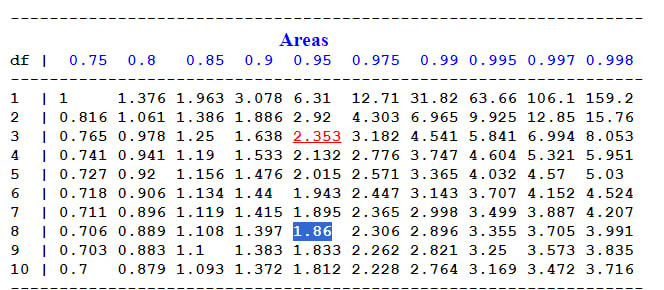

In [12]:
tpc = 1.86
print(tp(passwords[0*password_len:1*password_len],passwords[1*password_len:2*password_len]))

2.173203214695134


In [13]:
if tp(passwords[0*password_len:1*password_len],passwords[1*password_len:2*password_len]) > tpc:
    print("reject")
else:
    print("accept")

reject
